# AWS Ground Truth Workshop

1. s3 dataset
2. GroundTruth private workers
3. GroundTruth labeling jobs
4. Review the data output format

In [2]:
import boto3

In [9]:
bucket_groudtruth = 'beyoung-sm-groundtruth'
my_region = boto3.session.Session().region_name
my_region

'us-west-2'

In [10]:
# get region & create bucket
if my_region != 'us-east-1':
    !aws s3api create-bucket --bucket {bucket_groudtruth} --create-bucket-configuration LocationConstraint={my_region}
else:
    !aws s3api create-bucket --bucket {bucket_groudtruth}

{
    "Location": "http://beyoung-sm-groundtruth.s3.amazonaws.com/"
}


In [14]:
# upload the images to s3 bucket
# !aws s3 cp ./images s3://{bucket_groudtruth}/raw_data/sm_workshop --recursive --dryrun
!aws s3 cp ./images s3://{bucket_groudtruth}/raw_data/sm_workshop --recursive

upload: images/bear-02.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bear-02.jpg
upload: images/bear-03.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bear-03.jpg
upload: images/bear-01.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bear-01.jpg
upload: images/cat-01.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/cat-01.jpg
upload: images/bird-03.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bird-03.jpg
upload: images/bird-02.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bird-02.jpg
upload: images/bear-05.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bear-05.jpg
upload: images/cat-06.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/cat-06.jpg
upload: images/bird-07.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bird-07.jpg
upload: images/bird-06.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/bird-06.jpg
upload: images/cat-04.jpg to s3://beyoung-sm-groundtruth/raw_data/sm_workshop/cat-04.jpg
uploa

# Create Ground Truth Private team

Follow the step [here](https://docs.aws.amazon.com/sagemaker/latest/dg/sms-workforce-create-private-console.html)

# Create Labeling Jobs

Follow the step [here](https://docs.aws.amazon.com/sagemaker/latest/dg/sms-getting-started-step2.html)

* job name: demo-workshop-your-id-date
* Input dataset location, click on **"Create manifest file"**
    * bucket: s3://beyoung-sm-groundtruth/raw_data/sm_workshop/
    * type: images
    * Then "use this manifest file"
* Output path: s3://beyoung-sm-groundtruth/output/
* select "bounding box" work type
* private worker group
* labels: bear, dog, cat, bird
    

# Login to the GroundTruth URL to label the images

* In left navigation bar, select 'labeling-workforces', click 'private' tab, and you will get 'Labeling portal sign-in URL'

* Sign in this URL and start labeling works
* Start labeling works. It will take around 10 mins for 20+ pictures.
* After submitted all labeling works and wait for a while, you will see the labeling job process becomes completed.

# Bounding box output format

Reference [link](https://docs.aws.amazon.com/sagemaker/latest/dg/sms-data-output.html#sms-output-box)

In [3]:
import boto3

labeling_job = 'demo-workshop-20200417'

client = boto3.client('sagemaker')
response = client.describe_labeling_job(
    LabelingJobName=labeling_job
)
output_uri = response['LabelingJobOutput']['OutputDatasetS3Uri']
output_uri

's3://beyoung-sm-groundtruth/output/demo-workshop-20200417/manifests/output/output.manifest'

In [4]:
!aws s3 cp {output_uri} ./output.manifest

download: s3://beyoung-sm-groundtruth/output/demo-workshop-20200417/manifests/output/output.manifest to ./output.manifest


In [28]:
!tail -n 2 ./output.manifest

{"source-ref":"s3://beyoung-sm-groundtruth/raw_data/sm_workshop/dog-06.jpg","demo-workshop-20200417":{"annotations":[{"class_id":1,"width":541,"top":53,"height":335,"left":362},{"class_id":1,"width":216,"top":38,"height":335,"left":148}],"image_size":[{"width":910,"depth":3,"height":432}]},"demo-workshop-20200417-metadata":{"job-name":"labeling-job/demo-workshop-20200417","class-map":{"1":"dog"},"human-annotated":"yes","objects":[{"confidence":0.09},{"confidence":0.09}],"creation-date":"2020-04-20T03:46:31.217570","type":"groundtruth/object-detection"}}
{"source-ref":"s3://beyoung-sm-groundtruth/raw_data/sm_workshop/dog-07.jpg","demo-workshop-20200417":{"annotations":[{"class_id":1,"width":602,"top":358,"height":687,"left":499}],"image_size":[{"width":1694,"depth":3,"height":1979}]},"demo-workshop-20200417-metadata":{"job-name":"labeling-job/demo-workshop-20200417","class-map":{"1":"dog"},"human-annotated":"yes","objects":[{"confidence":0.09}],"creation-date":"2020-04-20T03:48:40.96427

# Let us use this as example to explain

{"source-ref":"s3://beyoung-sm-groundtruth/raw_data/sm_workshop/dog-06.jpg","demo-workshop-20200417":{"annotations":[{"class_id":1,"width":541,"top":53,"height":335,"left":362},{"class_id":1,"width":216,"top":38,"height":335,"left":148}],"image_size":[{"width":910,"depth":3,"height":432}]},"demo-workshop-20200417-metadata":{"job-name":"labeling-job/demo-workshop-20200417","class-map":{"1":"dog"},"human-annotated":"yes","objects":[{"confidence":0.09},{"confidence":0.09}],"creation-date":"2020-04-20T03:46:31.217570","type":"groundtruth/object-detection"}}

In [7]:
!aws s3 cp s3://beyoung-sm-groundtruth/raw_data/sm_workshop/dog-06.jpg ./dog-06.jpg

download: s3://beyoung-sm-groundtruth/raw_data/sm_workshop/dog-06.jpg to ./dog-06.jpg


In [ ]:
# Or, you can use images folder ./dog-06.jpg

# Python Image 101

## Images library in Python

* OpenCV: C++, python-wrapper (fastest)
* Pillow: Python, C
* Matplotlib
* scikit-image

## Numpy Array Image

Numpy  array will always have this order: (H, W, D) i.e. (height, width, depth) because of the terminology that numpy uses for ndarrays (axis=0, axis=1, axis=2) or analogously (Y, X, Z)

Numpy Array

```
            axis = 1
    (0,0)---------------------------
    |                              |
 a  |                              |
 x  |                              |
 i  |                              |
 s  |                              |
    |                              |
 0  |                              |
     --------------------image_size(w, h)
```

## Load and check image in Jupyter Notebook

The most easy way to show images in Jupyter notebook buildin libray `IPython.display.Image` to show images.

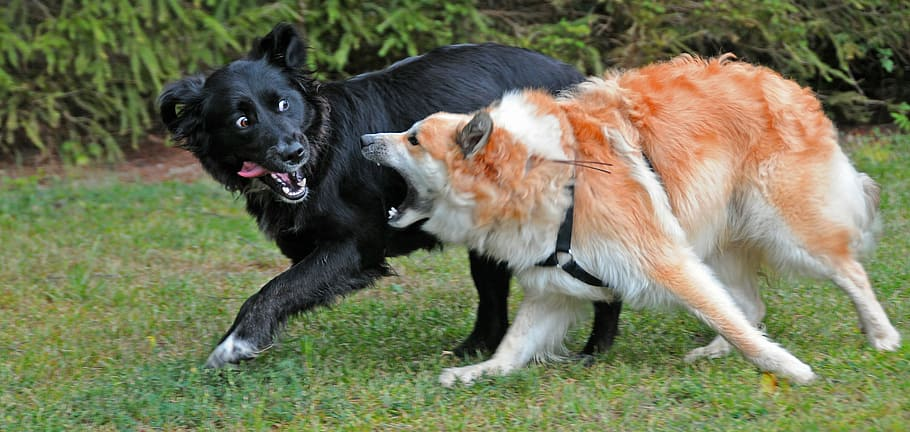

In [1]:
from IPython.display import Image as im
im(filename='./dog-06.jpg')

## Open CV

**Important**: open cv read image is BGR. If you want to show in jupyter notebook, must convert color space to RGB.

Here is the step summary:

1. Load an image using imread
2. Transform an image from BGR to RGB format by using cvtColor
3. Save your transformed image in a file on disk (using imwrite), use **BGRA** numpy array

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

## Load image

In [3]:
# the order of colors is BGR
img_raw = cv2.imread('./dog-06.jpg')
print(type(img_raw))
print('(H, W, channel)')
print(img_raw.shape)

<class 'numpy.ndarray'>
(H, W, channel)
(432, 910, 3)


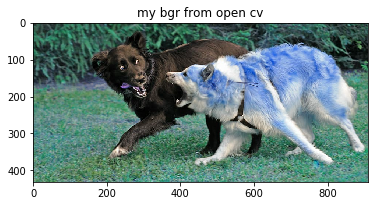

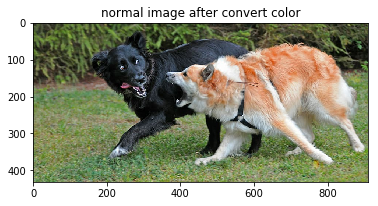

In [4]:
plt.imshow(img_raw)
plt.title('my bgr from open cv')
plt.show()

img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB) #BGR->RGB
plt.imshow(img_rgb)
plt.title('normal image after convert color')
plt.show()

## Draw Bounding Box

cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

```
(0,0)--------------------
|                       |
|    x1,y1 ------       | 
|    |          |       |
|    |          |       |  
|    |          |       |
|    --------x2,y2      |
|                       |
-------------------------
```
(255,0,0): color

2: thickness


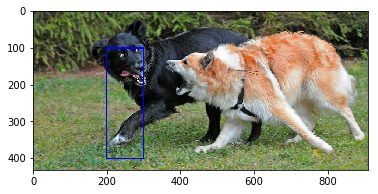

In [5]:
## img_op: image operation work
img_op = np.copy(img_raw)
img_op = cv2.rectangle(img_op, (200,100), (300,400), (255,0,0), 2)
img_rgb = cv2.cvtColor(img_op, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### ground truth bounding box format

```
{"annotations":[
    {"class_id":1,"width":541,"top":53,"height":335,"left":362},
    {"class_id":1,"width":216,"top":38,"height":335,"left":148}
 ],
 "image_size":[{"width":910,"depth":3,"height":432}]
}
```

The ground truth (0,0) is different coner.

```
(0,0)---------------------------
|                              |
|  left,top--------            | 
|    |            |            |
|    |          height         |  
|    |            |            |
|    ----width-----            |
|                              |
--------------------image_size(w, h)
```

53 362 541 335
362 53 903 388


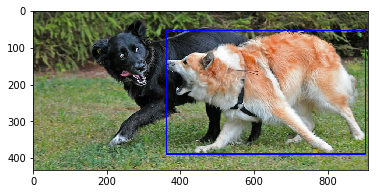

In [6]:
## box1
left, top, width, height = 362, 53, 541, 335
print(top, left, width, height)

## mapping to cv2 (x1, y1) (x2, y2)
x1, y1, x2, y2 = left, top, left + width, top + height
print(x1, y1, x2, y2)

img_op = np.copy(img_raw)
img_op = cv2.rectangle(img_op, (x1, y1), (x2, y2), (255,0,0), 2)
img_rgb = cv2.cvtColor(img_op, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

148 38 364 373


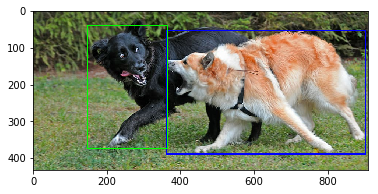

In [7]:
## box2
left, top, width, height = 148, 38, 216, 335

## mapping to cv2 (x1, y1) (x2, y2)
x1, y1, x2, y2 = left, top, left + width, top + height
print(x1, y1, x2, y2)

img_op = cv2.rectangle(img_op, (x1, y1), (x2, y2), (0,255,0), 2)
img_rgb = cv2.cvtColor(img_op, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Save images

In [8]:
cv2.imwrite('./dog-06-bbox.jpg', img_op)

True

## Method 2: Image Pillow

1. Load image from a file using `open`
2. Display image via ipython [`display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display)
3. Draw bounding box using `ImageDraw`
4. Convert PIL Image to numpy array using `np.array`
5. Convert numpy array to PIL Image using `Image.fromarray`
6. Save PIL image using `

Why Pillow?

1. High level image object
2. Easy to handle load image different mode [link](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes)
3. Easy to install compare to openCV

**Important**
* np.shape       (H, W, A)
* PIL.Image.size (W, H)

 * example:
    * np shape: (432, 910, 3) (H, W, A)
    * PIL image size: (910, 432) (W, H)


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(910, 432)


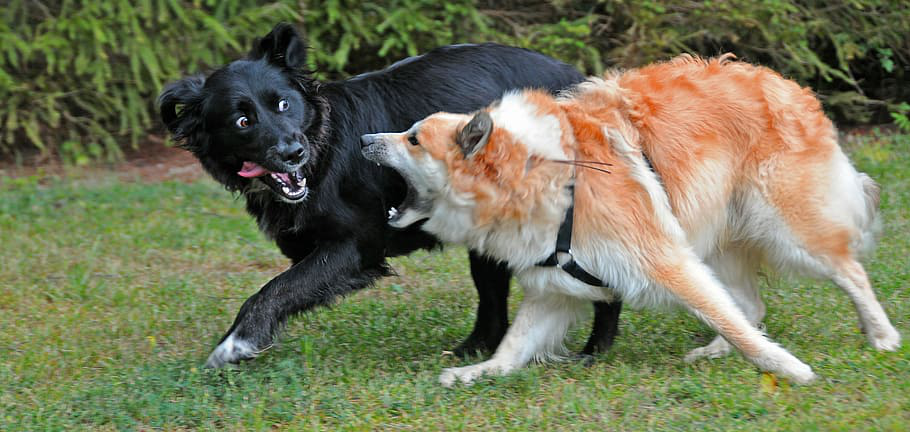

In [9]:
from PIL import Image

img_pil = Image.open('./dog-06.jpg')
print(type(img_pil))
print(img_pil.size)
display(img_pil)

In [10]:
from PIL import ImageDraw

## Draw bounding box

PIL need to add a layer, ImageDraw. And, operate the rectangle on this layer.

```
(0,0)--------------------
|                       |
|    x1,y1 ------       | 
|    |          |       |
|    |          |       |  
|    |          |       |
|    --------x2,y2      |
|                       |
-------------------------
```

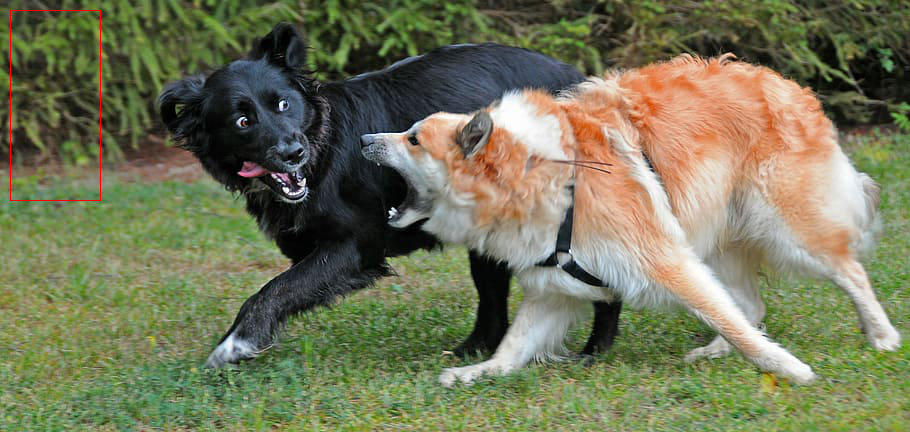

In [11]:
img_pil_op = img_pil.copy()
# create image draw
draw = ImageDraw.Draw(img_pil_op)
draw.rectangle(((10, 10), (100, 200)), outline=(255,0,0))
display(img_pil_op)

53 362 541 335
362 53 903 388
148 38 364 373


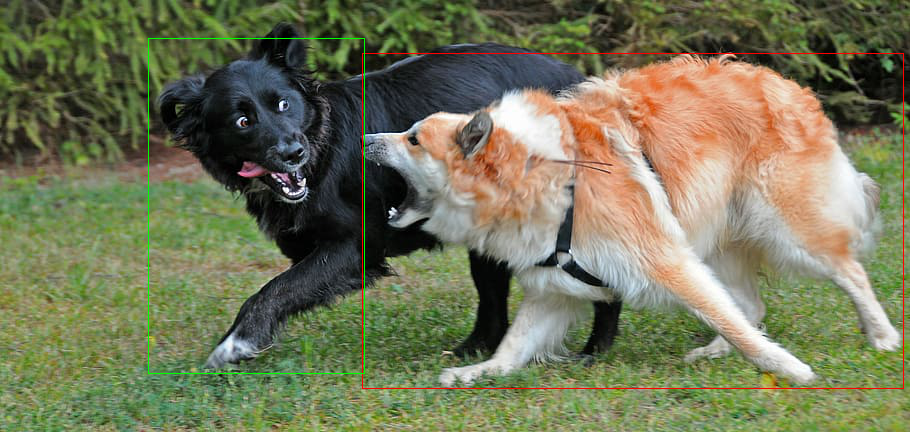

In [12]:
## box1
left, top, width, height = 362, 53, 541, 335
print(top, left, width, height)

## mapping to cv2 (x1, y1) (x2, y2)
x1, y1, x2, y2 = left, top, left + width, top + height
print(x1, y1, x2, y2)

img_pil_op = img_pil.copy()
draw = ImageDraw.Draw(img_pil_op)
draw.rectangle(((x1, y1), (x2, y2)), outline=(255,0,0))

## box2
left, top, width, height = 148, 38, 216, 335

## mapping to cv2 (x1, y1) (x2, y2)
x1, y1, x2, y2 = left, top, left + width, top + height
print(x1, y1, x2, y2)
draw.rectangle(((x1, y1), (x2, y2)), outline=(0,255,0))

display(img_pil_op)

## Conver PIL image object to numpy array and back

In [13]:
import numpy as np

# convert image to numpy array
img_np = np.array(img_pil_op)
print('np shape: {} (H, W, A)'.format(img_np.shape))
print('PIL image size: {} (W, H)'.format(img_pil_op.size))

np shape: (432, 910, 3) (H, W, A)
PIL image size: (910, 432) (W, H)


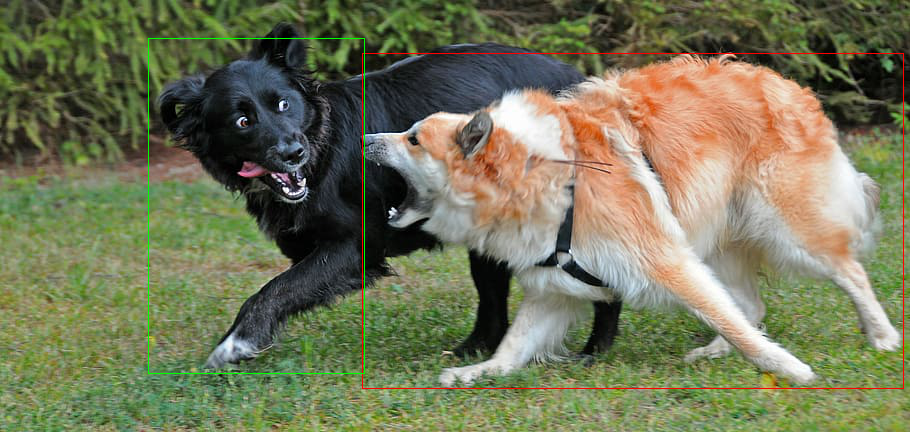

In [14]:
# Load numpy array to PIL image
img_pil_op2 = Image.fromarray(img_np)
display(img_pil_op2)

In [15]:
# Save Image
img_pil_op.save('./dog-06-pil.jpg')

# Method 3: Matplotlib

In [12]:
# load and display an image with Matplotlib
from matplotlib import image as image_plt
from matplotlib import pyplot as plt
import numpy as np

im_plt type: <class 'numpy.ndarray'> shape: (432, 910, 3)


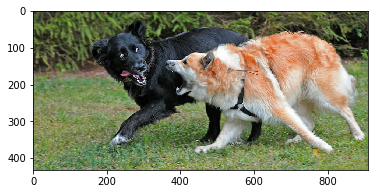

In [13]:
# load image as pixel array
im_plt = image_plt.imread('./dog-06.jpg')
# summarize shape of the pixel array
print('im_plt type: {} shape: {}'.format(type(im_plt), im_plt.shape))
# display the array of pixels as an image
plt.imshow(im_plt)
plt.show()

## Draw bounding box

Plot can draw rectangle. But it is use **xmin, ymin**, width, and height. Second, remember to set **fill=False**. Third, **RGBA** values should be within 0-1 range. Please aware the plot.imshow **origin [0,0]** setting. Default is **upper left** [link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html). Finally, after plt.show() is called, a new figure is created. You need to save plot before show.

```
(0,0)--------------------
|                       |
|    x1,y1 ------       | 
|    |          |       |
|    |          |       |
|    |        height    |  
|    |          |       |
|    |          |       |
|    ---width---        | 
|                       |
-------------------------
```

53 362 541 335
38 148 216 335


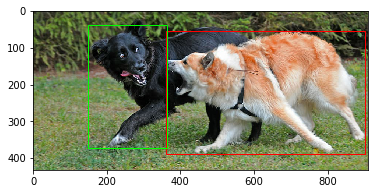

In [19]:
## copy to operation numpy array
im_plt_op = np.copy(im_plt)
plt.imshow(im_plt_op)

## box1
left, top, width, height = 362, 53, 541, 335
print(top, left, width, height)

bbox = plt.Rectangle((left, top), width, height, fill=False, edgecolor=(1,0,0), linewidth=1)
plt.gca().add_patch(bbox)

## box2
left, top, width, height = 148, 38, 216, 335
print(top, left, width, height)

bbox = plt.Rectangle((left, top), width, height, fill=False, edgecolor=(0,1,0), linewidth=1)
plt.gca().add_patch(bbox)

## Keep current figure for later save image.
fig_bbox = plt.gcf()

plt.show()

## Save Result to file

In [20]:
fig_bbox.savefig('dog-06-bbox-plt.jpg', dpi=1000)